<a href="https://colab.research.google.com/github/pk1510/CGAN/blob/main/test_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.1
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


     |████████████████████████████████| 276kB 13.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=7416c8f7ac19e16910a1ad2e88495cfe4074287c18a217fb452fabbdb0b00cd9
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 750kB/s 
     |████████████████████████████████| 2.2MB 21.9MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201218-cp36-none-any.whl size=40701 sha256=fe6c91a3cda235219a99f37e9104b3863beda3bb5b5647f90a9151fd3c7fcc1e
  Stored in directory: /root/.cache/pip/wheels/b5/83/3f/e74a72d264351b5ada512da845a5c6abb81a34f6333c3a54ce
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-a

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch, torchvision
import numpy as np
import cv2
import json
import io
from detectron2.data.datasets import register_coco_instances
import detectron2


import os, random

from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
setup_logger()

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



<Logger detectron2 (DEBUG)>

In [ ]:
dir=r"/content/drive/MyDrive/wheat-coco/archive (1)/coco/"
register_coco_instances("customDataset_train", {}, dir+r"annotations/instances_train2017.json", dir+r"images/train2017")
register_coco_instances("customDataset_test", {}, dir+r"annotations/instances_val2017.json", dir+r"images/val2017")

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("customDataset_train",)
cfg.DATASETS.TEST = ("customDataset_test", )
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 500
#cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
#cfg.MODEL.DEVICE="cpu"

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

evaluator = COCOEvaluator("customDataset_test", ("bbox", "segm"), False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "customDataset_test")
print(inference_on_dataset(trainer.model, test_loader, evaluator))

[01/01 08:22:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:07, 24.2MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[01/01 08:22:44 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.6/dist-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.6/dist-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.6/dist-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python

[01/01 08:23:07 d2.utils.events]:  eta: 0:03:43  iter: 19  total_loss: 5.027  loss_cls: 0.8392  loss_box_reg: 0.3452  loss_mask: 0.695  loss_rpn_cls: 2.873  loss_rpn_loc: 0.2446  time: 0.4555  data_time: 0.7113  lr: 4.9953e-06  max_mem: 2486M
[01/01 08:23:16 d2.utils.events]:  eta: 0:03:33  iter: 39  total_loss: 3.664  loss_cls: 0.7243  loss_box_reg: 0.439  loss_mask: 0.6878  loss_rpn_cls: 1.649  loss_rpn_loc: 0.2309  time: 0.4560  data_time: 0.0051  lr: 9.9902e-06  max_mem: 2486M
[01/01 08:23:26 d2.utils.events]:  eta: 0:03:27  iter: 59  total_loss: 2.821  loss_cls: 0.6406  loss_box_reg: 0.6076  loss_mask: 0.6741  loss_rpn_cls: 0.7041  loss_rpn_loc: 0.2163  time: 0.4673  data_time: 0.0056  lr: 1.4985e-05  max_mem: 2564M
[01/01 08:23:36 d2.utils.events]:  eta: 0:03:21  iter: 79  total_loss: 2.529  loss_cls: 0.5951  loss_box_reg: 0.6758  loss_mask: 0.6544  loss_rpn_cls: 0.3506  loss_rpn_loc: 0.2028  time: 0.4776  data_time: 0.0057  lr: 1.998e-05  max_mem: 2564M
[01/01 08:23:46 d2.utils.

In [ ]:
def customDataset_test(test_annotations):
    test=[]
    test_dict={}
    for (k, v) in test_annotations["images"].items():
        test_dict["file_name"]=v["file_name"]
        test_dict["height"]=v["height"]
        test_dict["width"]=v["width"]
        test_dict["image_id"]=v["id"]
        test_dict["annotations"]["bbox"]=test_annotations["annotations"][k]["bbox"].values()
        test_dict["annotations"]["bbox_mode"]=1
        test_dict["annotations"]["category_id"]=test_annotations["annotations"][k]["category_id"]
        test_dict["annotations"]["segmentation"]=test_annotations["annotations"][k]["segmentation"].values()
        test.append(test_dict)
        test_dict={}
    return test

In [ ]:
def _json_decode(json_bytes, encoding):
    tiow = io.TextIOWrapper(
        io.BytesIO(json_bytes), encoding=encoding, newline=""
    )
    obj = json.load(tiow)
    tiow.close()
    return obj

In [ ]:
test_dataset=[]
input_test=b""
with open(dir+r"annotations/instances_val2017.json", "rb") as f_val:
    #print(f.readable())
    input_test = f_val.read()
    test_dataset = _json_decode(input_test, "utf-8-sig")
    #print(test_annotations["images"])
    #test_dataset=customDataset_test(test_annotations)
    f_val.close()



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


29f8a1f30.jpg


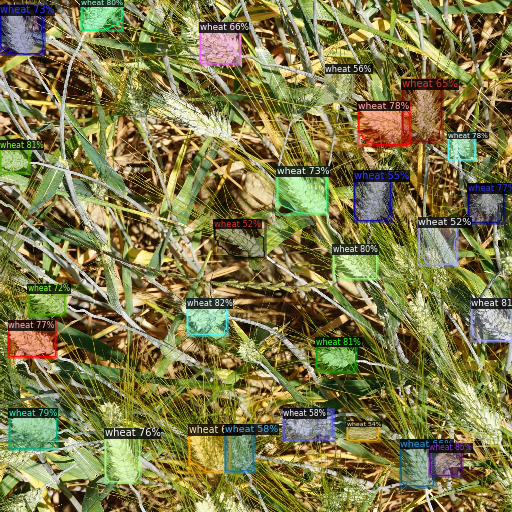

b40d7ae4e.jpg


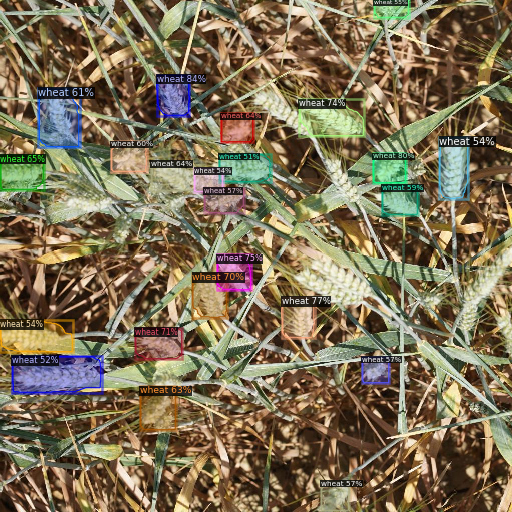

ffbfe7cc0.jpg


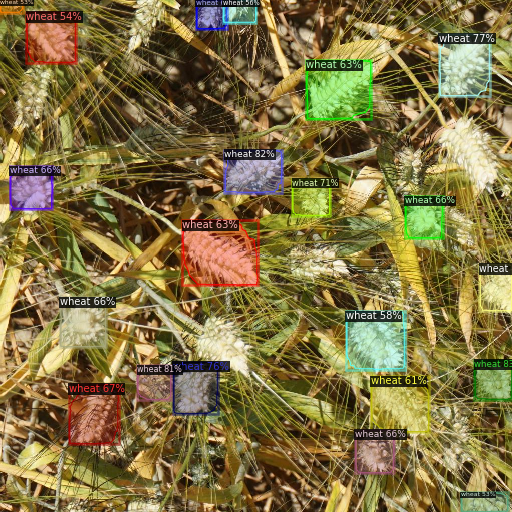

cf3ebbedd.jpg


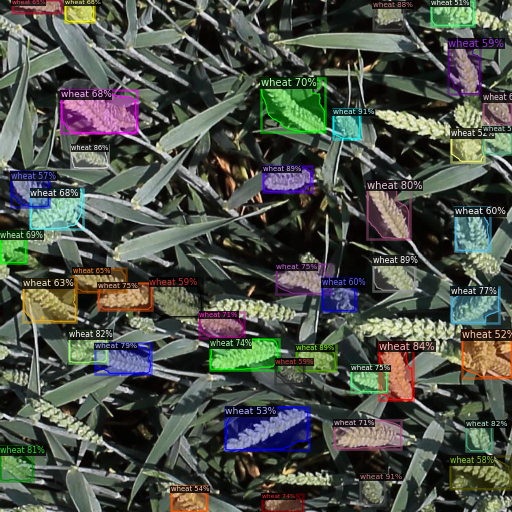

5aa3b67b7.jpg


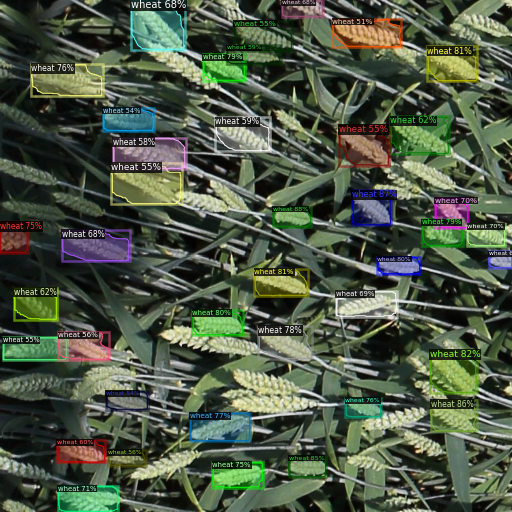

In [ ]:
from google.colab.patches import cv2_imshow
for dicts in random.sample(test_dataset["images"], 5):    
    img = cv2.imread(dir+r"images/val2017/"+dicts["file_name"])
    outputs = predictor(img)  
    v = Visualizer(img[:, :, ::-1],
                   metadata=MetadataCatalog.get("customDataset_test"), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    print(dicts["file_name"])
    cv2_imshow(out.get_image()[:, :, ::-1])
